# Classification Models to predict rainfall.

# Questions

# 1. Your views about the problem statement?

The problem statement involves predicting rainfall in Sydney using machine learning models. The dataset covering weather-related variables from 2008 to 2017, there is an opportunity to leverage machine learning techniques to improve the accuracy of rainfall predictions. The problem statement use various classification models, including decision trees and ensemble methods. These models can use features such as temperature, humidity, precipitation, and pressure to predict whether it will rain the next day.

# 2. What will be your approach to solving this task?

My approach to solving this task is as follows :

##### (A) Data Preprocessing

convert RainToday and RainTomorrow column into dummi variable
Replace Null values with mean of its
check for outliers in this dataset thier is no such outliers which affect the result
##### (B) Model Selcetion:

Trying various classification models, including Decision Trees and Ensemble methods (Random Forest, Gradient Boosting, AdaBoost, XGBoost).
##### (C) Model Training and Evaluation:

Split the data into test and train datasets.
Train the particular model on the training dataset.
evaluate their performance using metrics like accuracy, ROC AUC, recall, and precision.
Select the model with the best performance.
##### (D)Model Comparison:

Compare the performance of different models to select the best one
##### (E)Model Optimization:

use hyperparameter by gridsearchcv to improve model accuracy

# 3. What were the available ML model options you had to perform this task?

##### The available ML model options include:

Decision Trees,
Random Forest,
Gradient Boosting,
AdaBoost,
XGBoost,
Logistic Regression,
K-Nearest Neighbors &
Linear Discriminant Analysis

# 4. Which model’s performance is best and what could be the possible reason for that?
I evaluated several classification models and assessed their performance on the test dataset. Here are the results:

##### Logistic Regression:

Accuracy Score (Train): 83.7018%
Accuracy Score (Test): 81.7365%
ROC AUC Score (Test): 0.741395
Recall Score (Test): 0.55722
Precision Score (Test): 0.7237
##### K-Nearest Neighbors:

Accuracy Score (Train): 85.9498%
Accuracy Score (Test): 78.5928%
ROC AUC Score (Test): 0.6956
Recall Score (Test): 0.4946
Precision Score (Test): 0.6454
##### Linear Discriminant Analysis:

Accuracy Score (Train): 83.3646%
Accuracy Score (Test): 81.8862%
ROC AUC Score (Test): 0.75024
Recall Score (Test): 0.58381
Precision Score (Test): 0.71026
##### Decision Tree:

Accuracy Score (Train): 82.7276%
Accuracy Score (Test): 80.2395%
ROC AUC Score (Test): 0.73225
Recall Score (Test): 0.5760
Precision Score (Test): 0.6625
##### Random Forest:

Accuracy Score (Train): 91.3825%
Accuracy Score (Test): 82.4850%
ROC AUC Score (Test): 0.73596
Recall Score (Test): 0.53804
Precision Score (Test): 0.6625
##### Gradient Boosting:

Accuracy Score (Train): 84.7947%
Accuracy Score (Test): 82.9880%
ROC AUC Score (Test): 0.7290
Recall Score (Test): 0.5489
Precision Score (Test): 0.6966
###### AdaBoost:

Accuracy Score (Train): 84.4511%
Accuracy Score (Test): 0.8248502994011976
Precision Score (Test): 0.7815126050420168
Recall Score (Test): 0.5054347826086957
ROC AUC Score (Test): 0.7258578871721164
##### XGBoost:

Accuracy Score (Train): 86.6948%
Accuracy Score (Test): 83.08083%
Precision Score (Test): 0.7591240875912408
Recall Score (Test): 0.5652173913043478
ROC AUC Score (Test): 0.7485177865612648

##### Analysis and Decision:

XGBOOST has the best performance with an accuracy score of 83.0808% on the test dataset. XGBOOST reduces overfitting and provides robust predictions through ensemble methods.

If precision is a priority, Logistic Regression and AdaBoost may be considered, as both models have high precision scores. The choice of the best model depends on your specific goals and requirements.

# 5. What steps can you take to improve this selected model’s performance even further?

To further enhance the performance of the selected model, I took the following steps:

##### GridSearchCV for Tree Regression, Bagging, Gradient Boosting, Random Forest, AdaBoost, XGBoost and K-Nearest Neighbors:

To optimize the performance of the Decision Tree Regression model, I utilized GridSearchCV. This technique systematically searched through a range of hyperparameters to identify the best combination that enhances model performance.

For the Bagging model, the best hyperparameter identified was 'n_estimators': 10, which fine-tunes the ensemble of decision trees.

Random Forest was optimized with hyperparameters 'max_depth': 20,'min_samples_leaf': 4,'min_samples_split': 10,'n_estimators': 200 improving its performance.

AdaBoost's performance was enhanced by setting 'learning_rate': 0.1, 'n_estimators': 200 as the best hyperparameters.

XGBoost achieved improved results with ''colsample_bytree': 0.8,'learning_rate': 0.2,'max_depth': 3,'min_child_weight': 3,'n_estimators': 50,'subsample': 0.8} and 'subsample': 0.8 as the best hyperparameters.

For Logistic Regression, the best hyperparameters included 'C': 0.001 and 'penalty': 'l2'.

K-Nearest Neighbors were optimized with 'n_neighbors': 9 as the best hyperparameter.

These hyperparameters have been fine-tuned to improve the efficiency, accuracy, and robustness of each model.

In [29]:
import numpy as np

In [31]:
import pandas as pd

In [33]:
import seaborn as sns

In [35]:
df = pd.read_csv("C:/Users/GOKUL REDDY/Downloads/sydney_rain prediction.csv")

In [37]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  01-02-2008   Sydney     19.5     22.4      15.6          6.2       0.0   
1  02-02-2008   Sydney     19.5     25.6       6.0          3.4       2.7   
2  03-02-2008   Sydney     21.6     24.5       6.6          2.4       0.1   
3  04-02-2008   Sydney     20.2     22.8      18.8          2.2       0.0   
4  05-02-2008   Sydney     19.7     25.7      77.4          NaN       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  
0     20.7     20.9       Yes          Yes  
1     22.4     24.8       Yes          Yes  
2     23.5     23.0       Yes          Yes  
3     21.4     20.9       Yes          Yes  
4     22.5     25.5       Yes          Yes

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


In [41]:
#Dummy Variable 
df = pd.get_dummies(df, columns = ["RainToday", "RainTomorrow"], drop_first = True)

In [43]:
for column in df.select_dtypes(include=['bool']):
    df[column] = df[column].astype(int)

In [45]:
# replace
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Replace null values with mean for numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill null values in "RainToday" with the mode
df['RainToday_Yes'].fillna(df['RainToday_Yes'].mode()[0], inplace=True)


C:\Users\GOKUL REDDY\AppData\Local\Temp\ipykernel_23328\2032603145.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RainToday_Yes'].fillna(df['RainToday_Yes'].mode()[0], inplace=True)


# outliers

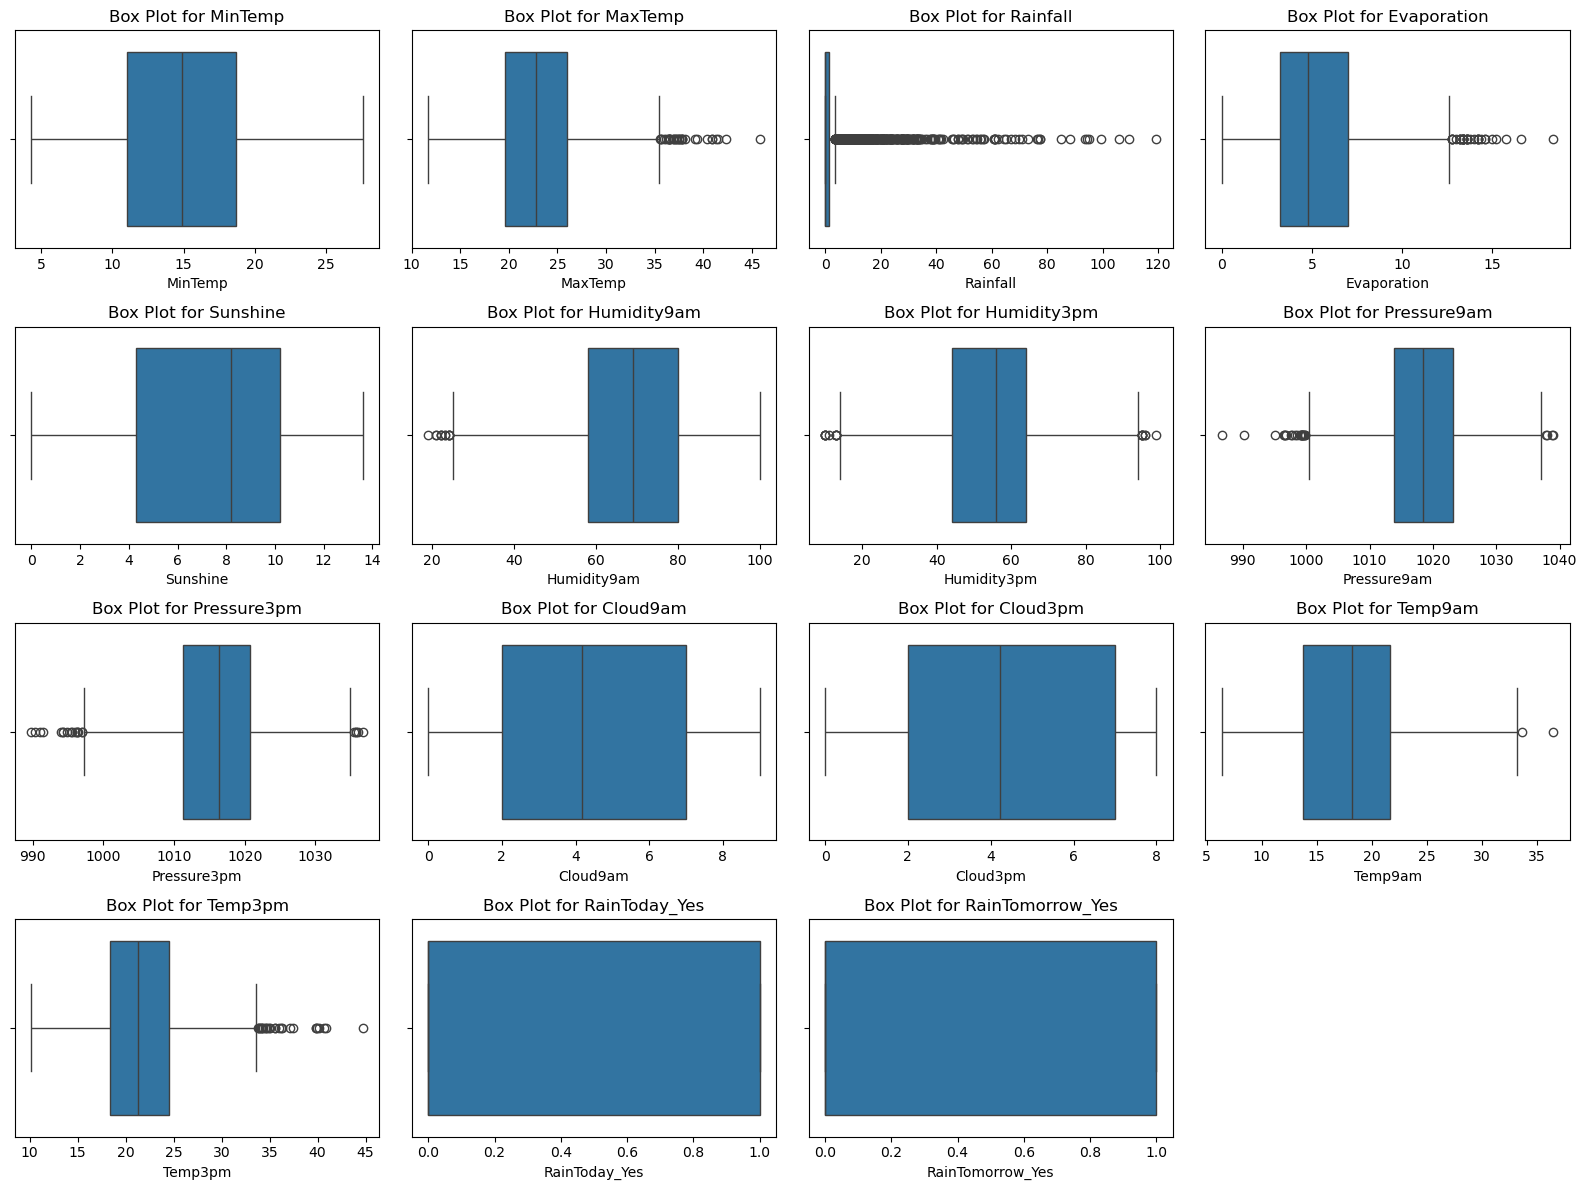

In [37]:
import matplotlib.pyplot as plt

# Select numeric columns for box plots
numeric_cols = df.select_dtypes(include='number').columns

# Create box plots for each numeric column
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()


In [39]:
upper_limit = np.percentile(df.MaxTemp, [99])[0]

In [41]:
df[(df.MaxTemp > 3*upper_limit)]

Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday_Yes, RainTomorrow_Yes]
Index: []

In [43]:
df.MaxTemp[(df.MaxTemp > 3*upper_limit)] = 3*upper_limit

C:\Users\GOKUL REDDY\AppData\Local\Temp\ipykernel_12624\505236707.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.MaxTemp[(df.MaxTemp > 3*upper_limit)] = 3*upper_limit
C:\Users\GOKUL REDDY\AppData\Local\Temp\ipykernel_12624\505236707.

<Axes: ylabel='MaxTemp'>

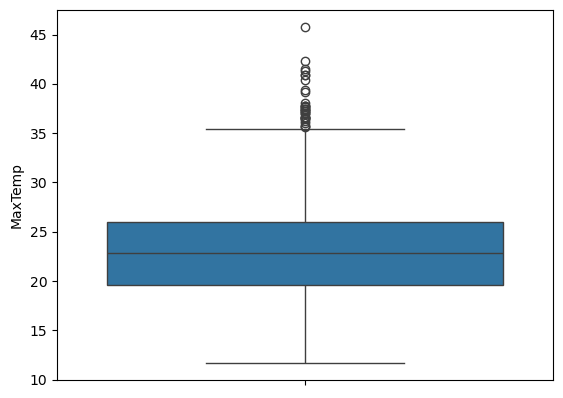

In [45]:
sns.boxplot(df['MaxTemp'])

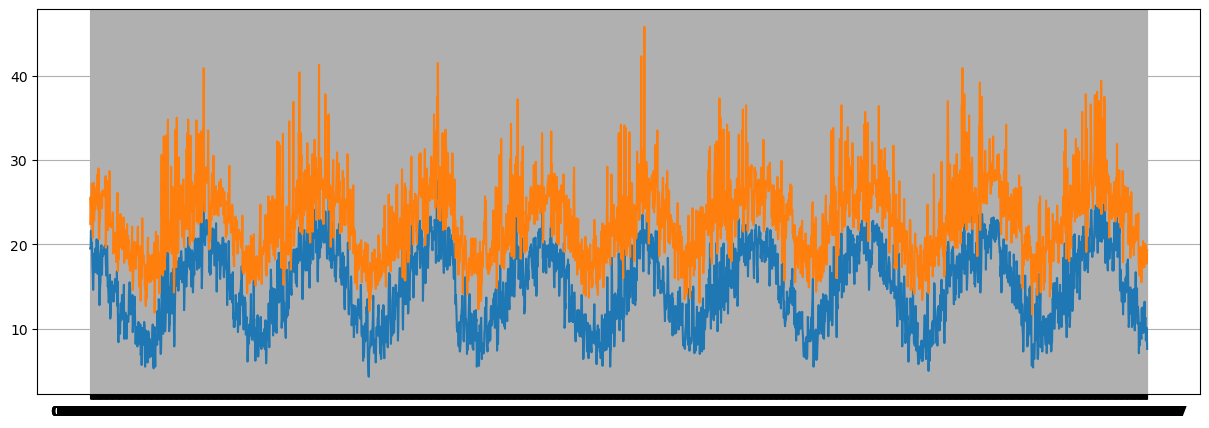

In [47]:
plt.figure(figsize = (15, 5))
fig = plt.plot(df['Date'], df[['MinTemp', 'MaxTemp']])
plt.grid();

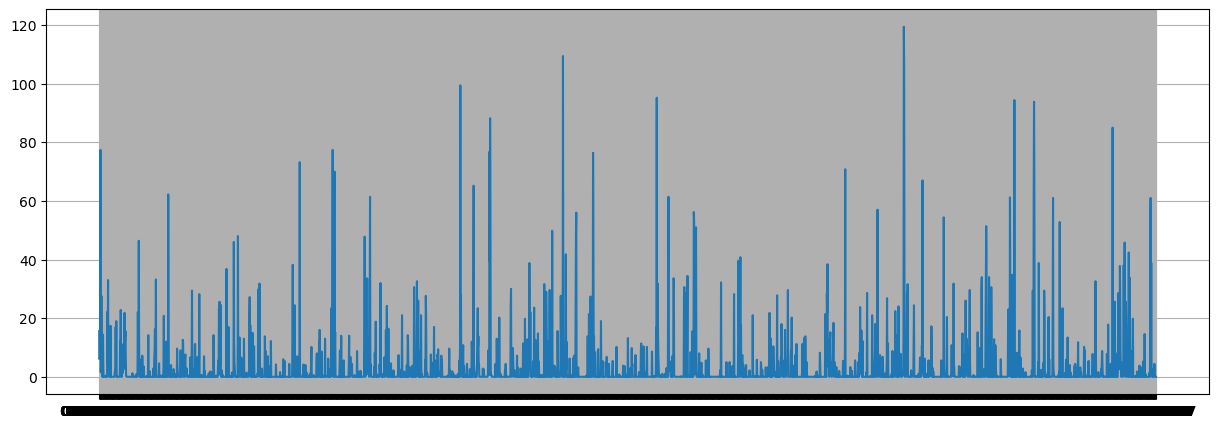

In [93]:
plt.figure(figsize = (15,5))
fig = plt.plot(df['Date'], df[['Rainfall']])
plt.grid();

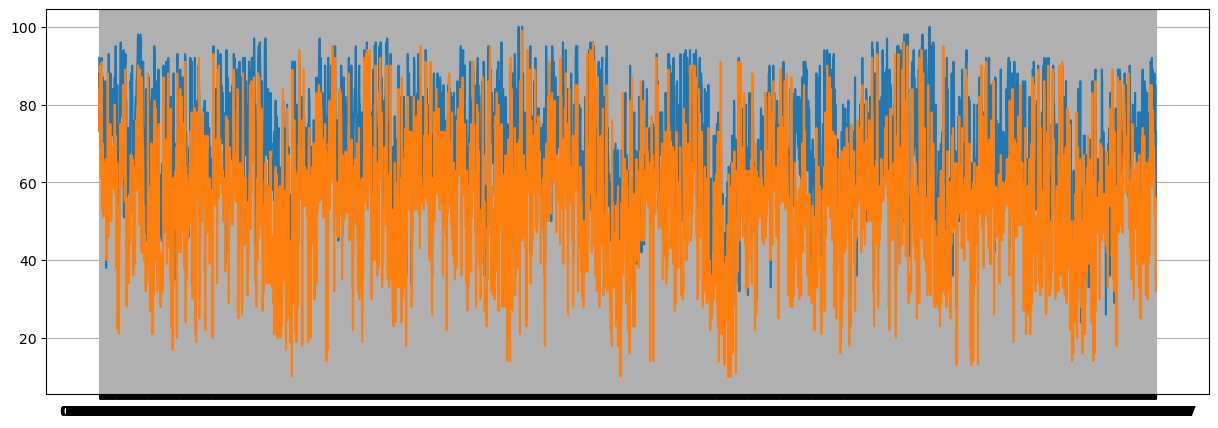

In [95]:
plt.figure(figsize = (15,5))
fig = plt.plot(df['Date'], df[['Humidity9am', 'Humidity3pm']])
plt.grid();

# Logestic regression

In [47]:
x_multi = df.drop(['RainTomorrow_Yes','Date','Location'], axis=1)

In [49]:
y_multi = df['RainTomorrow_Yes']

In [51]:
from sklearn.linear_model import LogisticRegression

In [55]:
clf_lrs = LogisticRegression()

In [57]:
clf_lrs.fit(x_multi,y_multi)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
clf_lrs.coef_

array([[-0.10445584,  0.09467187,  0.03335958,  0.01831498, -0.22350169,
         0.00521595,  0.04947227, -0.07050504,  0.06653092, -0.10749152,
         0.18449536,  0.03177008, -0.02377504,  0.05600933]])

In [61]:
clf_lrs.intercept_

array([0.00072016])

# 2nd model

In [63]:
import statsmodels.api as sn

In [64]:
x_cons1 = sn.add_constant(x_multi)

In [67]:
import statsmodels.discrete.discrete_model as sm

In [69]:
logit = sm.Logit(y_multi,x_cons1).fit()

Optimization terminated successfully.
         Current function value: 0.381640
         Iterations 7


In [71]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       RainTomorrow_Yes   No. Observations:                 3337
Model:                          Logit   Df Residuals:                     3322
Method:                           MLE   Df Model:                           14
Date:                Sun, 11 Aug 2024   Pseudo R-squ.:                  0.3331
Time:                        08:48:23   Log-Likelihood:                -1273.5
converged:                       True   LL-Null:                       -1909.5
Covariance Type:            nonrobust   LLR p-value:                5.635e-263
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            29.7954      8.542      3.488      0.000      13.053      46.538
MinTemp          -0.2385      0.048     -4.958      0.000      -0.333      -0.144
MaxTemp           0.0804      0.043      1.869      0.062      -0.004       0.165
Rainfall          0.0105      0.007      1.609      0.108      -0.002       0.023
Evaporation       0.0604      0.025      2.375      0.018       0.011       0.110
Sunshine         -0.2295      0.023    -10.137      0.000      -0.274      -0.185
Humidity9am       0.0133      0.007      1.928      0.054      -0.000       0.027
Humidity3pm       0.0514      0.007      7.510      0.000       0.038       0.065
Pressure9am      -0.1180      0.031     -3.815      0.000      -0.179      -0.057
Pressure3pm       0.0844      0.030      2.830      0.005       0.026       0.143
Cloud9am         -0.0806      0.030     -2.658      0.008      -0.140      -0.021
Cloud3pm          0.1465      0.032      4.597      0.000       0.084       0.209
Temp9am           0.1374      0.051      2.682      0.007       0.037       0.238
Temp3pm          -0.0233      0.050     -0.462      0.644      -0.122       0.075
RainToday_Yes     0.7040      0.137      5.143      0.000       0.436       0.972
=================================================================================
"""

# predict and confusion matrix

In [73]:
clf_lrs.predict_proba(x_multi)

array([[0.10627252, 0.89372748],
       [0.34010704, 0.65989296],
       [0.13181971, 0.86818029],
       ...,
       [0.67239977, 0.32760023],
       [0.9752025 , 0.0247975 ],
       [0.96685031, 0.03314969]])

In [75]:
y_pred = clf_lrs.predict(x_multi)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [77]:
y_pred_03 = (clf_lrs.predict_proba(x_multi)[:,1] >0.3)

In [79]:
y_pred_03

array([ True,  True,  True, ...,  True, False, False])

In [81]:
from sklearn.metrics import confusion_matrix

In [83]:
y = df['RainTomorrow_Yes']

In [85]:
confusion_matrix(y,y_pred)

array([[2288,  184],
       [ 383,  482]], dtype=int64)

In [87]:
confusion_matrix(y,y_pred_03)

array([[2032,  440],
       [ 243,  622]], dtype=int64)

# evaluating model

In [89]:
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [91]:
accuracy_score(y,y_pred)

0.8300869044051543

In [91]:
precision_score(y,y_pred)

0.7237237237237237

In [93]:
recall_score(y,y_pred)

0.5572254335260116

In [95]:
from sklearn.metrics import roc_auc_score

In [97]:
roc_auc_score(y,y_pred)

0.7413958882840415

# linear discriminant analysis

In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [95]:
clf_lda = LinearDiscriminantAnalysis()

In [97]:
clf_lda.fit(x_multi,y_multi)

LinearDiscriminantAnalysis()

In [99]:
y_pred_lda = clf_lda.predict(x_multi)

In [103]:
y_pred_lda

array([1, 1, 1, ..., 0, 0, 0])

In [105]:
accuracy_score(y,y_pred_lda)

0.8303865747677555

In [109]:
confusion_matrix(y_multi,y_pred_lda)

array([[2266,  206],
       [ 360,  505]], dtype=int64)

In [111]:
precision_score(y,y_pred_lda)

0.710267229254571

In [113]:
recall_score(y,y_pred_lda)

0.5838150289017341

In [115]:
roc_auc_score(y,y_pred_lda)

0.7502408477842004

# test-train split

In [107]:
x_multi = df.drop(['RainTomorrow_Yes','Date', 'Location'], axis=1)
y_multi = df['RainTomorrow_Yes']

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size=0.2, random_state=42)

# Knn regression

# standardizing variables

In [109]:
from sklearn import preprocessing

In [111]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)

In [113]:
scaler = preprocessing.StandardScaler().fit(x_test)
x_test_s= scaler.transform(x_test)

In [115]:
x_test_s

array([[ 1.04426593,  1.04074676, -0.34819373, ...,  1.13874668,
         0.65666291, -0.63278692],
       [ 0.84472816, -0.21245532, -0.34819373, ...,  0.6698061 ,
        -0.29142965, -0.63278692],
       [ 1.68722099,  0.86485875, -0.34819373, ...,  1.26107901,
         0.79540817, -0.63278692],
       ...,
       [ 1.24380371, -0.14649731, -0.11826097, ...,  0.60863994,
        -0.01393914,  1.58031079],
       [ 0.31262742,  0.33719472, -0.34819373, ...,  0.26203169,
         0.49479345, -0.63278692],
       [ 0.86689902,  0.84287275, -0.26607489, ...,  0.52708506,
         1.04977447, -0.63278692]])

In [117]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1 = KNeighborsClassifier(n_neighbors = 1)
clf_knn_1.fit(x_train_s,y_train)

KNeighborsClassifier(n_neighbors=1)

In [119]:
confusion_matrix(y_test,clf_knn_1.predict(x_test_s))

array([[405,  79],
       [ 75, 109]], dtype=int64)

In [121]:
from sklearn.metrics import accuracy_score

In [151]:
accuracy_score(y_test,clf_knn_1.predict(x_test_s))

0.7694610778443114

In [155]:
precision_score(y_test,clf_knn_1.predict(x_test_s))

0.5797872340425532

In [159]:
recall_score(y_test,clf_knn_1.predict(x_test_s))

0.592391304347826

In [135]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_3 = KNeighborsClassifier(n_neighbors = 3)
clf_knn_3.fit(x_train_s,y_train)
accuracy_score(y_test,clf_knn_3.predict(x_test_s))

0.7979041916167665

In [127]:
from sklearn.model_selection import GridSearchCV

In [129]:
params = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10]}

In [131]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(),params)

In [133]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)

In [135]:
grid_search_cv.fit(x_train_s,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [137]:
grid_search_cv.best_params_

{'n_neighbors': 9}

In [139]:
optimized_knn = grid_search_cv.best_estimator_

In [141]:
y_test_pred1 = optimized_knn.predict(x_test_s)

In [149]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_pred1)

array([[443,  41],
       [ 90,  94]], dtype=int64)

In [145]:
accuracy_score(y_test,y_test_pred1)

0.8038922155688623

# classification tree

In [157]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 3)

In [159]:
clftree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [161]:
y_train_pred = clftree.predict(x_train)
y_test_pred = clftree.predict(x_test)

In [163]:
from sklearn.metrics import confusion_matrix

In [288]:
cfm_train_ct = confusion_matrix(y_train, y_train_pred)
cfm_test_ct = confusion_matrix(y_test, y_test_pred)
acs_train_ct = accuracy_score(y_train, y_train_pred)
acs_test_ct = accuracy_score(y_test, y_test_pred)
pcs_train_ct = precision_score(y_train, y_train_pred)
pcs_test_ct = precision_score(y_test, y_test_pred)
rcs_train_ct = recall_score(y_train, y_train_pred)
rcs_test_ct = recall_score(y_test, y_test_pred)
roc_auc_score_train = roc_auc_score(y_train, y_train_pred)
roc_auc_score_test = roc_auc_score(y_test,y_test_pred)

In [290]:
print("Confusion Matrix (Training Data):")
print(cfm_train_ct)

print("\nAccuracy Score (Training Data):", acs_train_ct)
print("\nPrecision Score (Training Data):", pcs_train_ct)
print("\nRecall Score (Training Data):", rcs_train_ct)
print("\nROC AUC Score (Training Data):", roc_auc_score_train)

print("\n------------------------------------------------------")
# Print the confusion matrix and accuracy score for testing data
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_ct)

print("\nAccuracy Score (Testing Data):", acs_test_ct)
print("\nPrecision Score (Test Data):", pcs_test_ct)
print("\nRecall Score (Test Data):", rcs_test_ct)
print("\nROC AUC Score (Test Data):", roc_auc_score_test)
print("\n------------------------------------------------------")

Confusion Matrix (Training Data):
[[1815  173]
 [ 288  393]]

Accuracy Score (Training Data): 0.8272761333832896

Precision Score (Training Data): 0.6943462897526502

Recall Score (Training Data): 0.5770925110132159

ROC AUC Score (Training Data): 0.7450351891082176

------------------------------------------------------

Confusion Matrix (Testing Data):
[[430  54]
 [ 78 106]]

Accuracy Score (Testing Data): 0.8023952095808383

Precision Score (Test Data): 0.6625

Recall Score (Test Data): 0.5760869565217391

ROC AUC Score (Test Data): 0.7322583542939275

------------------------------------------------------


# Bagging

In [169]:
from sklearn import tree
clftree1 = tree.DecisionTreeClassifier()

In [171]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(estimator=clftree, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=42)

In [173]:
bag_clf.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=1000, n_jobs=-1, random_state=42)

In [175]:
confusion_matrix(y_test,bag_clf.predict(x_test))

array([[462,  22],
       [ 98,  86]], dtype=int64)

In [177]:
accuracy_score(y_test,bag_clf.predict(x_test))

0.8203592814371258

In [179]:
param_grid = {
    'n_estimators': [10, 50, 100]
}

In [181]:
grid_search = GridSearchCV(bag_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                                         n_estimators=1000, n_jobs=-1,
                                         random_state=42),
             param_grid={'n_estimators': [10, 50, 100]}, scoring='accuracy')

In [183]:
best_params = grid_search.best_params_
best_bagging_clf = grid_search.best_estimator_

In [185]:
best_params

{'n_estimators': 10}

In [418]:
best_bagging_clf

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
                  random_state=42)

In [187]:
y_train_pred_bagging = best_bagging_clf.predict(x_train)
y_test_pred_bagging = best_bagging_clf.predict(x_test)

In [189]:
y_train_pred_bagging

array([0, 0, 0, ..., 0, 0, 0])

In [191]:
y_test_pred_bagging

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [193]:
cfm_train_bagging = confusion_matrix(y_train, y_train_pred_bagging)
cfm_test_bagging = confusion_matrix(y_test, y_test_pred_bagging)
acs_train_bagging = accuracy_score(y_train, y_train_pred_bagging)
acs_test_bagging = accuracy_score(y_test, y_test_pred_bagging)
pcs_train_bagging = precision_score(y_train, y_train_pred_bagging)
pcs_test_bagging = precision_score(y_test, y_test_pred_bagging)
rcs_train_bagging = recall_score(y_train, y_train_pred_bagging)
rcs_test_bagging = recall_score(y_test, y_test_pred_bagging)
roc_auc_score_train_bagging = roc_auc_score(y_train, y_train_pred_bagging)
roc_auc_score_test_bagging = roc_auc_score(y_test, y_test_pred_bagging)

In [195]:
print("Best Hyperparameter:", best_params)
print("Bagging Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_bagging)
print("\nAccuracy Score (Training Data):", acs_train_bagging)
print("\nPrecision Score (Training Data):", pcs_train_bagging)
print("\nRecall Score (Training Data):", rcs_train_bagging)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_bagging)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_bagging)
print("\nAccuracy Score (Testing Data):", acs_test_bagging)
print("\nPrecision Score (Test Data):", pcs_test_bagging)
print("\nRecall Score (Test Data):", rcs_test_bagging)
print("\nROC AUC Score (Test Data):", roc_auc_score_test_bagging)
print("\n------------------------------------------------------")

Best Hyperparameter: {'n_estimators': 10}
Bagging Classifier Results:
Confusion Matrix (Training Data):
[[1923   65]
 [ 357  324]]

Accuracy Score (Training Data): 0.8418883476957663

Precision Score (Training Data): 0.8329048843187661

Recall Score (Training Data): 0.47577092511013214

ROC AUC Score (Training Data): 0.7215373740238789

------------------------------------------------------

Confusion Matrix (Testing Data):
[[462  22]
 [ 97  87]]

Accuracy Score (Testing Data): 0.8218562874251497

Precision Score (Test Data): 0.7981651376146789

Recall Score (Test Data): 0.47282608695652173

ROC AUC Score (Test Data): 0.7136857707509882

------------------------------------------------------


# Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
rf_clf = RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)

In [169]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [171]:
confusion_matrix(y_test,rf_clf.predict(x_test))

array([[449,  35],
       [ 81, 103]], dtype=int64)

In [173]:
accuracy_score(y_test,rf_clf.predict(x_test))

0.8263473053892215

In [175]:
param_grid = {
    'n_estimators': [50, 200],
    'max_depth': [10, 20],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [1, 4],
}

In [177]:
grid_search_rf = GridSearchCV(rf_clf, param_grid, cv=3, scoring='accuracy')
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                              random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 200]},
             scoring='accuracy')

In [179]:
best_params_rf = grid_search_rf.best_params_
best_rf_classifier = grid_search_rf.best_estimator_


In [181]:
best_params_rf

{'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [213]:
y_train_pred_rf = best_rf_classifier.predict(x_train)
y_test_pred_rf = best_rf_classifier.predict(x_test)


In [217]:
cfm_train_rf = confusion_matrix(y_train, y_train_pred_rf)
cfm_test_rf = confusion_matrix(y_test, y_test_pred_rf)
acs_train_rf = accuracy_score(y_train, y_train_pred_rf)
acs_test_rf = accuracy_score(y_test, y_test_pred_rf)
pcs_train_rf = precision_score(y_train, y_train_pred_rf)
pcs_test_rf = precision_score(y_test, y_test_pred_rf)
rcs_train_rf = recall_score(y_train, y_train_pred_rf)
rcs_test_rf = recall_score(y_test, y_test_pred_rf)
roc_auc_score_train_rf = roc_auc_score(y_train, y_train_pred_rf)
roc_auc_score_test_rf = roc_auc_score(y_test, y_test_pred_rf)

In [219]:
print("Random Forest Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_rf)
print("\nAccuracy Score (Training Data):", acs_train_rf)
print("\nPrecision Score (Training Data):", pcs_train_rf)
print("\nRecall Score (Training Data):", rcs_train_rf)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_rf)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_rf)
print("\nAccuracy Score (Testing Data):", acs_test_rf)
print("\nPrecision Score (Test Data):", pcs_test_rf)
print("\nRecall Score (Test Data):", rcs_test_rf)
print("\nROC AUC Score (Test Data):", roc_auc_score_test_rf)
print("\n------------------------------------------------------")

Random Forest Classifier Results:
Confusion Matrix (Training Data):
[[1955   33]
 [ 197  484]]

Accuracy Score (Training Data): 0.913825402772574

Precision Score (Training Data): 0.9361702127659575

Recall Score (Training Data): 0.71071953010279

ROC AUC Score (Training Data): 0.8470599662586384

------------------------------------------------------

Confusion Matrix (Testing Data):
[[452  32]
 [ 85  99]]

Accuracy Score (Testing Data): 0.8248502994011976

Precision Score (Test Data): 0.7557251908396947

Recall Score (Test Data): 0.5380434782608695

ROC AUC Score (Test Data): 0.7359638878907654

------------------------------------------------------


# Gradient Boosting

In [185]:
from sklearn.ensemble import GradientBoostingClassifier

In [187]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [189]:
accuracy_score(y_test,gbc_clf.predict(x_test))

0.8203592814371258

In [191]:
gbc_clf2=GradientBoostingClassifier(learning_rate=0.02,n_estimators=1000,max_depth=1)
gbc_clf2.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [193]:
accuracy_score(y_train,gbc_clf2.predict(x_train))

0.8467590857999251

In [195]:
accuracy_score(y_test,gbc_clf2.predict(x_test))

0.8248502994011976

# Ada boost

In [198]:
from sklearn.ensemble import AdaBoostClassifier

In [200]:
ada_clf = AdaBoostClassifier(learning_rate = 0.02,n_estimators =500)

In [202]:
ada_clf.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.02, n_estimators=500)

In [206]:
param_grid_adaboost = {
    'n_estimators': [50,  200],
    'learning_rate': [0.01, 0.1, 0.2],
}

In [208]:
grid_search_adaboost = GridSearchCV(ada_clf, param_grid_adaboost, cv=3, scoring='accuracy')
grid_search_adaboost.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramDa

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(learning_rate=0.02, n_estimators=500),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 200]},
             scoring='accuracy')

In [212]:
best_params_adaboost = grid_search_adaboost.best_params_
best_adaboost_classifier = grid_search_adaboost.best_estimator_

In [214]:
best_params_adaboost

{'learning_rate': 0.1, 'n_estimators': 200}

In [259]:
y_train_pred_adaboost = best_adaboost_classifier.predict(x_train)
y_test_pred_adaboost = best_adaboost_classifier.predict(x_test)

In [261]:
cfm_train_adaboost = confusion_matrix(y_train, y_train_pred_adaboost)
cfm_test_adaboost = confusion_matrix(y_test, y_test_pred_adaboost)
acs_train_adaboost = accuracy_score(y_train, y_train_pred_adaboost)
acs_test_adaboost = accuracy_score(y_test, y_test_pred_adaboost)
pcs_train_adaboost = precision_score(y_train, y_train_pred_adaboost)
pcs_test_adaboost = precision_score(y_test, y_test_pred_adaboost)
rcs_train_adaboost = recall_score(y_train, y_train_pred_adaboost)
rcs_test_adaboost = recall_score(y_test, y_test_pred_adaboost)
roc_auc_score_train_adaboost = roc_auc_score(y_train, y_train_pred_adaboost)
roc_auc_score_test_adaboost = roc_auc_score(y_test, y_test_pred_adaboost)

In [263]:
print("AdaBoost Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_adaboost)
print("\nAccuracy Score (Training Data):", acs_train_adaboost)
print("\nPrecision Score (Training Data):", pcs_train_adaboost)
print("\nRecall Score (Training Data):", rcs_train_adaboost)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_adaboost)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_adaboost)
print("\nAccuracy Score (Testing Data):", acs_test_adaboost)
print("\nPrecision Score (Testing Data):", pcs_test_adaboost)
print("\nRecall Score (Testing Data):", rcs_test_adaboost)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_adaboost)
print("\n------------------------------------------------------")

AdaBoost Classifier Results:
Confusion Matrix (Training Data):
[[1908   80]
 [ 335  346]]

Accuracy Score (Training Data): 0.8445110528287748

Precision Score (Training Data): 0.812206572769953

Recall Score (Training Data): 0.5080763582966226

ROC AUC Score (Training Data): 0.7339174548022347

------------------------------------------------------

Confusion Matrix (Testing Data):
[[458  26]
 [ 91  93]]

Accuracy Score (Testing Data): 0.8248502994011976

Precision Score (Testing Data): 0.7815126050420168

Recall Score (Testing Data): 0.5054347826086957

ROC AUC Score (Testing Data): 0.7258578871721164

------------------------------------------------------


# XGBoost

In [216]:
from xgboost import XGBClassifier

In [218]:
xgb_classifier = XGBClassifier(random_state=42)

In [220]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

In [222]:
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=3, scoring='accuracy')
grid_search_xgb.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [296]:
best_params_xgb = grid_search_xgb.best_params_
best_xgb_classifier = grid_search_xgb.best_estimator_

In [298]:
best_params_xgb

{'colsample_bytree': 0.8,
 'learning_rate': 0.2,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 50,
 'subsample': 0.8}

In [300]:
best_xgb_classifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [294]:
y_train_pred_xgb = best_xgb_classifier.predict(x_train)
y_test_pred_xgb = best_xgb_classifier.predict(x_test)

In [284]:
cfm_train_xgb = confusion_matrix(y_train, y_train_pred_xgb)
cfm_test_xgb = confusion_matrix(y_test, y_test_pred_xgb)
acs_train_xgb = accuracy_score(y_train, y_train_pred_xgb)
acs_test_xgb = accuracy_score(y_test, y_test_pred_xgb)
pcs_train_xgb = precision_score(y_train, y_train_pred_xgb)
pcs_test_xgb = precision_score(y_test, y_test_pred_xgb)
rcs_train_xgb = recall_score(y_train, y_train_pred_xgb)
rcs_test_xgb = recall_score(y_test, y_test_pred_xgb)
roc_auc_score_train_xgb = roc_auc_score(y_train, y_train_pred_xgb)
roc_auc_score_test_xgb = roc_auc_score(y_test, y_test_pred_xgb)

In [286]:
print("XGBoost Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_xgb)
print("\nAccuracy Score (Training Data):", acs_train_xgb)
print("\nPrecision Score (Training Data):", pcs_train_xgb)
print("\nRecall Score (Training Data):", rcs_train_xgb)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_xgb)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_xgb)
print("\nAccuracy Score (Testing Data):", acs_test_xgb)
print("\nPrecision Score (Testing Data):", pcs_test_xgb)
print("\nRecall Score (Testing Data):", rcs_test_xgb)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_xgb)
print("\n------------------------------------------------------")

XGBoost Classifier Results:
Confusion Matrix (Training Data):
[[1903   85]
 [ 270  411]]

Accuracy Score (Training Data): 0.8669913825402773

Precision Score (Training Data): 0.8286290322580645

Recall Score (Training Data): 0.6035242290748899

ROC AUC Score (Training Data): 0.7803838449197387

------------------------------------------------------

Confusion Matrix (Testing Data):
[[451  33]
 [ 80 104]]

Accuracy Score (Testing Data): 0.8308383233532934

Precision Score (Testing Data): 0.7591240875912408

Recall Score (Testing Data): 0.5652173913043478

ROC AUC Score (Testing Data): 0.7485177865612648

------------------------------------------------------
